In [1]:
# ====================================
# 1. Librerías
# ====================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# ====================================
# 2. Cargar datos
# ====================================
data = pd.read_csv("/Users/gabrielreyes/Downloads/comprar_alquilar.csv")
print("Primeras filas del dataset:")
display(data.head())


Primeras filas del dataset:


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [3]:
# ====================================
# 3. Preprocesamiento
# ====================================
# Convertir variables categóricas a numéricas (One-Hot Encoding)
data_encoded = pd.get_dummies(data, drop_first=True)

# Separar variables predictoras
X = data_encoded.drop(columns=["comprar"])
y = data_encoded["comprar"]

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# ====================================
# 4. Aplicar PCA (2 componentes para graficar)
# ====================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con resultados
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["comprar"] = y.values

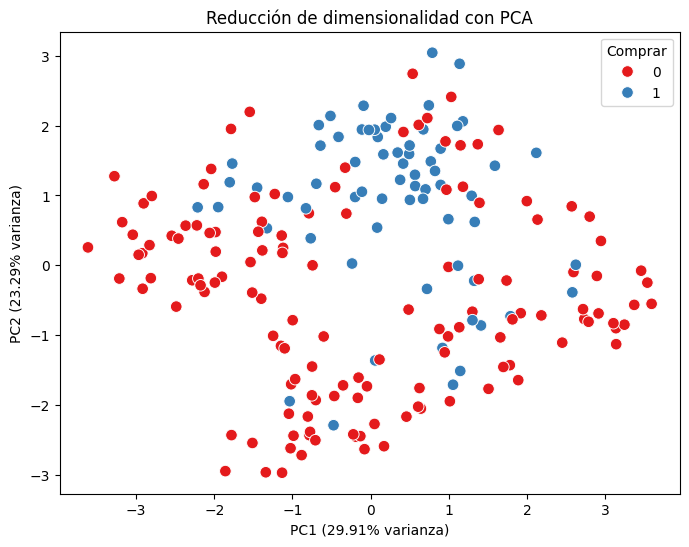

In [5]:

# ====================================
# 5. Visualización
# ====================================
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="comprar", data=pca_df, palette="Set1", s=70)
plt.title("Reducción de dimensionalidad con PCA")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% varianza)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% varianza)")
plt.legend(title="Comprar")
plt.show()

In [6]:
# ====================================
# 6. Varianza explicada
# ====================================
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

Varianza explicada por cada componente:
[0.29913557 0.23294923]
